# Tutorial about example datasets

In [1]:
import sys
from pathlib import Path
import shutil
import logging

import requests

import locan as lc

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
lc.show_versions(system=False, dependencies=False, verbose=False)


Locan:
   version: 0.11.dev28+g6e88c3a

Python:
   version: 3.8.12


In [3]:
logging.basicConfig(stream=sys.stdout, level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

## Load SMLM data from ShareLoc.XYZ

SMLM data can e.g. be found on [ShareLoc.XYZ](https://shareloc.xyz), an open platform for sharing single-molecule localization microscopy data.

Copy a specific download link for downloading a smlm-file.

In [4]:
url = "https://zenodo.org/api/files/48a8996a-e9ef-49d8-be2b-25026c3c5dbd/UniWue_Tubulin_AF647_3/data.smlm"
url

'https://zenodo.org/api/files/48a8996a-e9ef-49d8-be2b-25026c3c5dbd/UniWue_Tubulin_AF647_3/data.smlm'

In [5]:
response = requests.get(url)
print("Response is ok: ", response.status_code == requests.codes.ok)

Response is ok:  True


In [6]:
file_path = Path.home() / Path(url).name

with open(file_path, 'wb') as file:
    for chunk in response.iter_content(chunk_size=128):
        file.write(chunk)
        
file_path

WindowsPath('C:/Users/sod28mb/data.smlm')

### Load data and visualize

In [7]:
locdata = lc.load_SMLM_file(file_path)

Print information about the data: 

In [8]:
print('Data head:')
print(locdata.data.head(), '\n')
print('Summary:')
locdata.print_summary()
print('Properties:')
print(locdata.properties)

Data head:
   original_index    position_x  local_background  chi_square     intensity  \
0               1   1653.339966        733.021973   6224440.0  13324.799805   
1               2   5672.879883        798.614990   2066740.0  10348.000000   
2               3   7117.830078        909.901978   1787550.0   6864.439941   
3               4   3707.459961        804.187012   2542450.0   9038.549805   
4               5  14038.200195        815.343994   1842030.0   8774.750000   

   frame    position_y  
0      0   8879.339844  
1      0   9851.900391  
2      0  11888.099609  
3      0  15224.799805  
4      0   5597.879883   

Summary:
identifier: "1"
comment: ""
creation_date: "2022-02-09 11:12:03 +0100"
modification_date: ""
source: EXPERIMENT
state: RAW
element_count: 4582761
frame_count: 45000
file_type: SMLM
file_path: "C:\\Users\\sod28mb\\data.smlm"

Properties:
{'localization_count': 4582761, 'position_x': 15788.7705, 'position_y': 16751.121, 'region_measure_bb': 1078728300.0

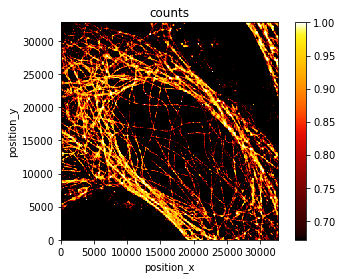

In [9]:
lc.render_2d(locdata, bin_size=100, rescale='equal');

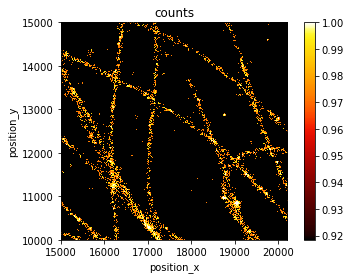

In [10]:
lc.render_2d(locdata, bin_size=10, rescale='equal',
             bin_range=((15_000, 20_200), (10_000, 15_000)));

## Load SMLM data from LocanDatasets

Selected example datasets are provided in a separate directory (repository) called `LocanDatasets`.

These datasets can be loaded by ready-to-go utility functions.

### Set up a datasets directory

In [11]:
lc.DATASETS_DIR = Path.home() / 'LocanDatasets'
lc.DATASETS_DIR.mkdir(exist_ok=True)

### Load dSTORM data of nuclear pore complexes

This is a rather large 2D dataset with > 2 mio localizations.

In [12]:
url = "https://raw.github.com/super-resolution/LocanDatasets/main/smlm_data/npc_gp210.asdf"

In [13]:
response = requests.get(url)
print("Response is ok: ", response.status_code == requests.codes.ok)

Response is ok:  True


In [14]:
file_path = lc.DATASETS_DIR / 'npc_gp210.asdf'

with open(file_path, 'wb') as file:
    for chunk in response.iter_content(chunk_size=128):
        file.write(chunk)
        
file_path

WindowsPath('C:/Users/sod28mb/LocanDatasets/npc_gp210.asdf')

In [15]:
dat = lc.load_npc()

Print information about the data: 

In [16]:
print('Data head:')
print(dat.data.head(), '\n')
print('Summary:')
dat.print_summary()
print('Properties:')
print(dat.properties)

Data head:
     position_x    position_y  frame     intensity  two_kernel_improvement  \
0   5768.129883  20242.400391    0.0  83745.398438                     0.0   
1  21402.800781  18154.599609    0.0  67648.296875                     0.0   
2  11410.700195   3155.639893    0.0  73358.398438                     0.0   
3  15570.599609  15854.599609    0.0  65827.898438                     0.0   
4  22235.500000  12840.900391    0.0  56347.398438                     0.0   

   chi_square  local_background  
0   4355630.0       1511.459961  
1   8383720.0       1637.000000  
2   2420450.0       1480.380005  
3   2539930.0       1540.670044  
4  16152800.0       1572.040039   

Summary:
identifier: "13"
comment: ""
creation_date: "2021-11-30 15:40:00 +0100"
modification_date: ""
source: EXPERIMENT
state: RAW
element_count: 2285189
frame_count: 24999
file_type: RAPIDSTORM
file_path: "c:\\users\\sod28mb\\mydata\\programming\\python\\projects\\LocanDatasets\\smlm_data\\npc_gp210.txt"

Prop

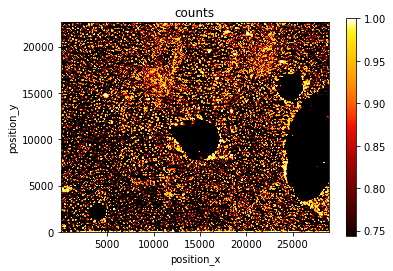

In [17]:
lc.render_2d(dat, bin_size=100, rescale='equal');

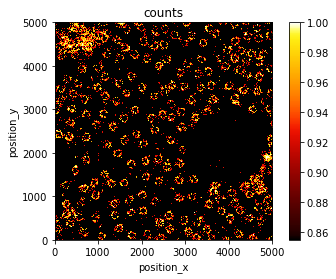

In [18]:
lc.render_2d(dat, bin_size=10, rescale='equal',
             bin_range=((0, 5000), (0, 5000)));

### Load dSTORM data of microtubules

This is a rather large 2D dataset with about 1.5 mio localizations.

In [19]:
url = "https://raw.github.com/super-resolution/LocanDatasets/main/smlm_data/tubulin_cos7.asdf"

In [20]:
response = requests.get(url)
print("Response is ok: ", response.status_code == requests.codes.ok)

Response is ok:  True


In [21]:
file_path = lc.DATASETS_DIR / 'tubulin_cos7.asdf'

with open(file_path, 'wb') as file:
    for chunk in response.iter_content(chunk_size=128):
        file.write(chunk)
        
file_path

WindowsPath('C:/Users/sod28mb/LocanDatasets/tubulin_cos7.asdf')

In [22]:
dat = lc.load_tubulin()

Print information about the data: 

In [23]:
print('Data head:')
print(dat.data.head(), '\n')
print('Summary:')
dat.print_summary()
print('Properties:')
print(dat.properties)

Data head:
     position_x    position_y  frame     intensity  chi_square  \
0   9937.400391  16751.300781    0.0  40501.601562   3744920.0   
1   9998.709961  12022.799805    0.0  36280.300781  14295400.0   
2   9566.769531   8078.229980    0.0  29984.000000  12302200.0   
3  15492.500000  10120.400391    0.0  38488.300781   3219820.0   
4   6381.459961  16057.700195    0.0  37093.300781   1620450.0   

   local_background  
0        709.413025  
1        800.455017  
2        890.807007  
3        495.067993  
4        476.035004   

Summary:
identifier: "7"
comment: ""
creation_date: "2021-11-30 14:52:17 +0100"
modification_date: ""
source: EXPERIMENT
state: RAW
element_count: 1506568
frame_count: 74969
file_type: RAPIDSTORM
file_path: "c:\\users\\sod28mb\\mydata\\programming\\python\\projects\\LocanDatasets\\smlm_data\\tubulin_cos7.txt"

Properties:
{'localization_count': 1506568, 'position_x': 8833.605738466662, 'position_y': 10446.826432598386, 'region_measure_bb': 289612323.4905

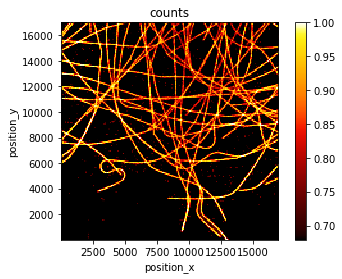

In [24]:
lc.render_2d(dat, bin_size=100, rescale='equal');

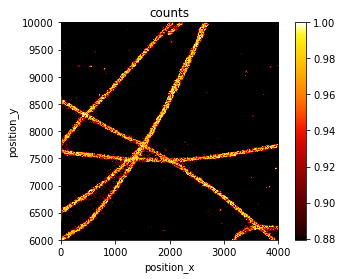

In [25]:
lc.render_2d(dat, bin_size=10, rescale='equal',
             bin_range=((0, 4000), (6000, 10_000)));